In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn 
%matplotlib inline 

# step 1 is to import the datasets 

In [4]:
from sklearn.datasets import load_breast_cancer #this data is in the form of a dictionary

In [5]:
cancer = load_breast_cancer() 

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
df = pd.DataFrame(cancer["data"],columns = cancer["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.shape

(569, 30)

# PCA visualization 

In [19]:
# first we convert our data by doing standardisatio or normalisation 

In [20]:
from sklearn.preprocessing import StandardScaler 

In [21]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [23]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [25]:
from sklearn.decomposition import PCA

In [28]:
scaled_data.shape

(569, 30)

In [32]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)

PCA(n_components=3)

In [35]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.19283683,  1.94858306, -1.1231662 ],
       [ 2.3878018 , -3.76817175, -0.52929273],
       [ 5.73389628, -1.07517379, -0.55174755],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053],
       [10.37479406,  1.6720101 , -1.87702933],
       [-5.4752433 , -0.67063682,  1.49044302]])

In [34]:
x_pca.shape   #the 30 dimensions are reduced into 2 

(569, 3)

Text(0, 0.5, 'Second Principal component')

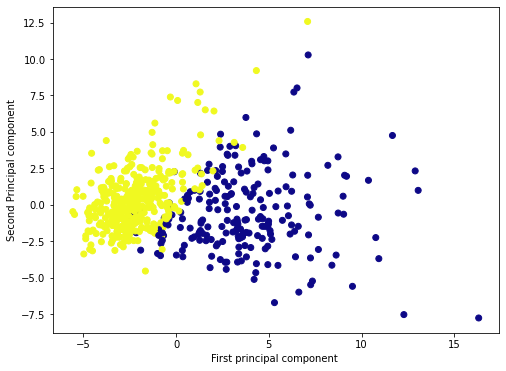

In [37]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = cancer["target"],cmap = "plasma")
plt.xlabel("First principal component ")
plt.ylabel("Second Principal component")

# intrepreting components

In [38]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016536, -0.03476751,  0.19034877,  0.36657546,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271591,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230436,
         0.14359318,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.06454989, -0.00931422,  0.02869952, -0.10429188,
        -0.07409158,  0.00273383, -0.02556354, -0

## In this numpy matrix array, each row represents a principal component, and each column relates back to the original features.
## we can visualize this relationship with a heatmap:

In [40]:
# creating a data frame of pca components as data in rows and features as columns 
df_comp = pd.DataFrame(pca.components_, columns = cancer["feature_names"])

<AxesSubplot:>

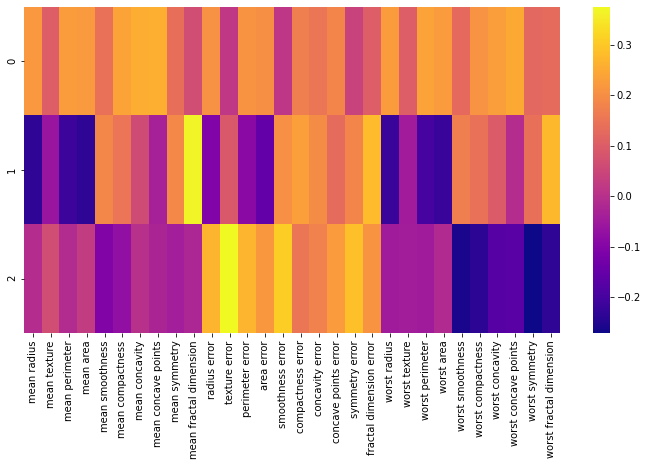

In [41]:
#creating a heatmap
plt.figure(figsize = (12,6))
sn.heatmap(df_comp , cmap = "plasma")

# Heatmaps are used to show relationships between two variables, 
# one plotted on each axis. By observing how cell colors change across each axis,
# you can observe if there are any patterns in value for one or both variables

# conclusion - pca is used when deaing with very high dimension of data
